In [63]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer


In [64]:
df = pd.read_csv('Clear_mbti.csv')
print(df.shape)
print(df.head())


(8675, 2)
   type                                              posts
0  INFJ  moment sportscenter top ten play prank lifecha...
1  ENTP  im find lack post alarm sex boring position of...
2  INTP  good one course say know thats bless curse abs...
3  INTJ  dear enjoyed conversation day esoteric gabbing...
4  ENTJ  youre fire thats another silly misconception a...


In [65]:
df.dropna(inplace=True)


In [66]:
count_vect = CountVectorizer(lowercase=False)
X_counts = count_vect.fit_transform(df['posts'])

In [32]:
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

In [33]:
features = count_vect.get_feature_names_out()
df = pd.DataFrame(X_tfidf.toarray(), columns=features)


In [68]:
df['type'] = df['type'].str.split('_').str[0]


In [73]:
infp = df[df['type'] == 'ENTJ']['posts']
all_posts = ' '.join(infp)

In [74]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

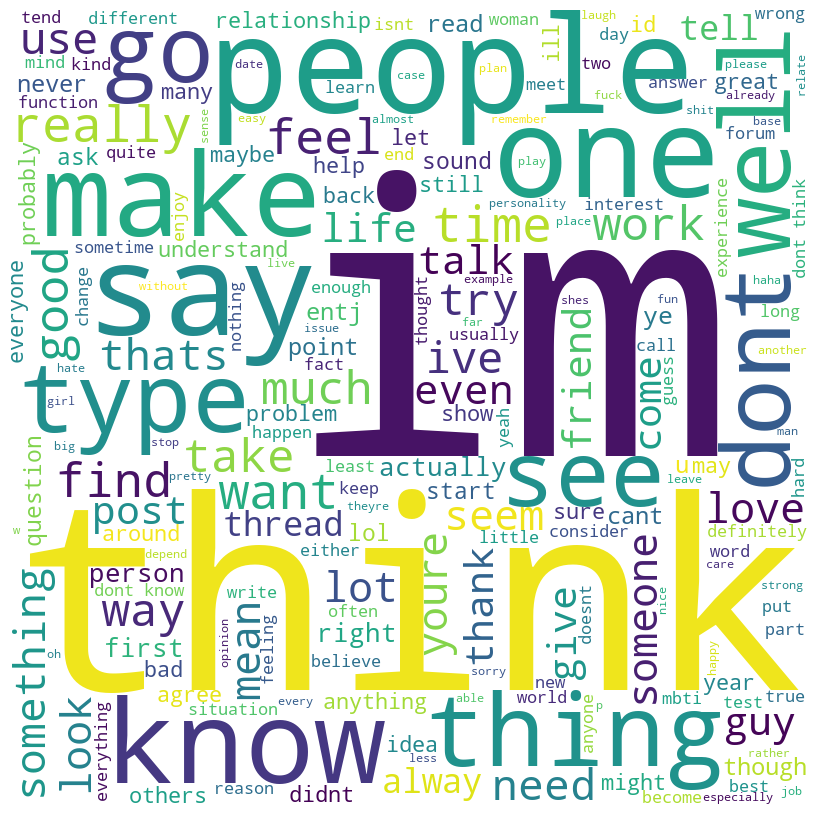

In [75]:
wordcloud = WordCloud(width = 800, height= 800, \
                background_color = 'white', 
                min_font_size = 10).generate(all_posts)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [79]:
df.to_csv('Done_mbti.csv', index=False)